In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
from datetime import datetime
import numpy as np
import scipy as sp
from scipy import stats
from scipy import integrate
from pandas import Series, DataFrame
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
import japanize_matplotlib
from random import Random

from GLMM_With_Metropolis_Hastings import PoissonRegression_On_Bayes, np_mode

%matplotlib inline
%matplotlib ipympl

In [2]:
def agg_data_for_unit():
    data_sets = pd.DataFrame()
    beacon_files = os.listdir('raw_data/')
    pos_files = os.listdir('POS_RAW_data/')

    beacon_files.sort()
    pos_files.sort()
    
    if beacon_files[0] == ".DS_Store":
        beacon_files.pop(0)

    if pos_files[0] == ".DS_Store":
        pos_files.pop(0)

    pos_files = list(map(lambda x: x[:14], pos_files))[::2]

    for beacon_file, pos_file in zip(beacon_files, pos_files):
        date_beacon = beacon_file[9:17]
        date_pos    = pos_file[6:14]

        if date_beacon != date_pos:
            continue
        else:
            date = date_beacon
        
        t_start = datetime.strptime(f'{date} 09:00', '%Y%m%d %H:%M').timestamp()
        t_end   = datetime.strptime(f'{date} 21:00', '%Y%m%d %H:%M').timestamp()
        rssi    = 70
        beacon_data = pd.read_csv(f"raw_data/{beacon_file}")
        pos_data1 = pd.read_csv(f"POS_RAW_data/{pos_file}_01.csv")
        pos_data2 = pd.read_csv(f"POS_RAW_data/{pos_file}_02.csv")

        pos_data1 = pos_data1[["商品コード", "商品名称（または券名称）", "単価", "数量", "合計金額"]]
        pos_data2 = pos_data2[["商品コード", "商品名称（または券名称）", "単価", "数量", "合計金額"]]
        pos_data  = pd.concat([pos_data1, pos_data2])

        pos_data[["単価", "数量", "合計金額"]] = pos_data[["単価", "数量", "合計金額"]].map(lambda x: int(x))
        pos_data = pos_data.groupby(["商品コード", "商品名称（または券名称）"]).sum()

        pos_data["単価"] = pos_data["合計金額"] / pos_data["数量"]
        pos_data["単価"] = pos_data["単価"].astype(int)

        beacon_data.columns = ["No.", "mac-address", "distance", "rssi", "random", "timestamp"]
        beacon_data = beacon_data[beacon_data["random"] == 1]
        beacon_data = beacon_data[beacon_data["timestamp"] >= t_start]
        beacon_data = beacon_data[beacon_data["timestamp"] <= t_end]
        beacon_data = beacon_data[beacon_data["rssi"] < rssi]
        beacon_data = beacon_data.drop_duplicates("mac-address")

        per_unit = pd.DataFrame(
            {
                "date":[date],
                "総ビーコン数": [len(beacon_data)],
                "総売上点数": [pos_data["数量"].sum()],
                "総売上": [pos_data["合計金額"].sum()],
            }
        )
        data_sets = pd.concat([data_sets, per_unit])

    return data_sets.reset_index(drop=True)

In [3]:
data_sets = agg_data_for_unit()

X = data_sets.drop(["date", "総売上点数", "総売上"], axis=1)
y = data_sets["総売上点数"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = PoissonRegression_On_Bayes(isGLMM=False)
model.sampling(X_train, y_train, scale=2, iter_num=5000)

#iterate 5000回  10m 2.2s

現在ite:0  保存サンプリング数:0


/Users/h_nagino/work/一般線形回帰/To_Nagino2/C-united_カフェドクリエ京都四条店/GLMM_With_Metropolis_Hastings.py:239: RuntimeWarning: divide by zero encountered in log
  log_prob       = np.sum(np.log(prob)) + np.log(restrict_prob)


現在ite:100  保存サンプリング数:100
現在ite:200  保存サンプリング数:200
現在ite:300  保存サンプリング数:300
現在ite:400  保存サンプリング数:400
現在ite:500  保存サンプリング数:500
現在ite:600  保存サンプリング数:600
現在ite:700  保存サンプリング数:700
現在ite:800  保存サンプリング数:800
現在ite:900  保存サンプリング数:900
現在ite:1000  保存サンプリング数:1000
現在ite:1100  保存サンプリング数:1100
現在ite:1200  保存サンプリング数:1200
現在ite:1300  保存サンプリング数:1300
現在ite:1400  保存サンプリング数:1400
現在ite:1500  保存サンプリング数:1500
現在ite:1600  保存サンプリング数:1600
現在ite:1700  保存サンプリング数:1700
現在ite:1800  保存サンプリング数:1800
現在ite:1900  保存サンプリング数:1900
現在ite:2000  保存サンプリング数:2000
現在ite:2100  保存サンプリング数:2100
現在ite:2200  保存サンプリング数:2200
現在ite:2300  保存サンプリング数:2300
現在ite:2400  保存サンプリング数:2400
現在ite:2500  保存サンプリング数:2500
現在ite:2600  保存サンプリング数:2600
現在ite:2700  保存サンプリング数:2700
現在ite:2800  保存サンプリング数:2800
現在ite:2900  保存サンプリング数:2900
現在ite:3000  保存サンプリング数:3000
現在ite:3100  保存サンプリング数:3100
現在ite:3200  保存サンプリング数:3200
現在ite:3300  保存サンプリング数:3300
現在ite:3400  保存サンプリング数:3400
現在ite:3500  保存サンプリング数:3500
現在ite:3600  保存サンプリング数:3600
現在ite:3700  保存サンプリング数:3700
現在ite:3800  保存サンプリン

True

Statistics information
          mean      median      std      mode
alpha     0.13618   0.13399     0.19753     0.17201
alpha0    6.64204   6.66459     0.35898     6.72262



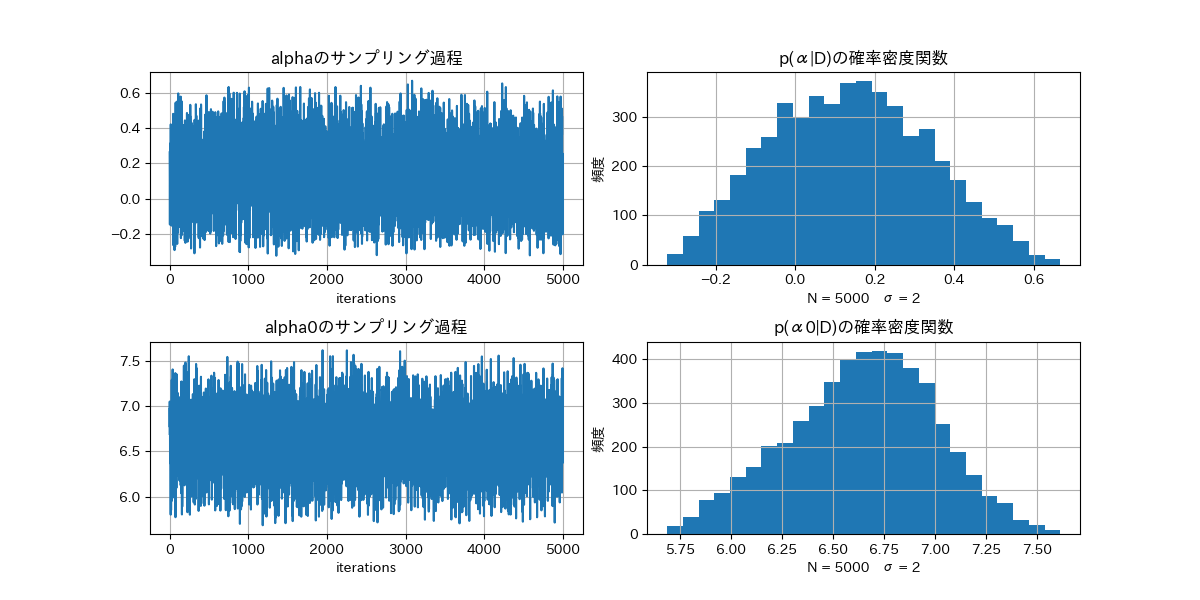

In [4]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.15,hspace=0.4)

plt.subplot(2,2,1)
plt.plot(np.arange(0, model.sampling_alpha.shape[0], 1), model.sampling_alpha)
plt.title("alphaのサンプリング過程")
plt.xlabel("iterations")
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(model.sampling_alpha[:, 0], bins=25)
plt.title("p(α|D)の確率密度関数")
plt.xlabel(f"N = {model.sampling_alpha.shape[0]}   σ = {2}")
plt.ylabel("頻度")
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(np.arange(0, model.sampling_alpha0.shape[0], 1), model.sampling_alpha0)
plt.title("alpha0のサンプリング過程")
plt.xlabel("iterations")
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(model.sampling_alpha0, bins=25)
plt.title("p(α0|D)の確率密度関数")
plt.xlabel(f"N = {model.sampling_alpha0.shape[0]}   σ = {2}")
plt.ylabel("頻度")
plt.grid(True)

print("Statistics information")
print("          mean      median      std      mode")
print("alpha     {:.5f}   {:.5f}     {:.5f}     {:.5f}".format(np.mean(model.sampling_alpha    ), np.median(model.sampling_alpha    ), np.std(model.sampling_alpha    ), np_mode(model.sampling_alpha )))
print("alpha0    {:.5f}   {:.5f}     {:.5f}     {:.5f}".format(np.mean(model.sampling_alpha0   ), np.median(model.sampling_alpha0   ), np.std(model.sampling_alpha0   ), np_mode(model.sampling_alpha0)))
print("")

In [5]:
data_sets = agg_data_for_unit()

X = data_sets.drop(["date", "総売上点数", "総売上"], axis=1)
y = data_sets["総売上点数"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = PoissonRegression_On_Bayes(isGLMM=True, gauss_quadrature_dim=3200)
model.sampling(X_train, y_train, scale=2, iter_num=5000)

#iterate 3000回  10m 32.0s

/Users/h_nagino/work/一般線形回帰/To_Nagino2/C-united_カフェドクリエ京都四条店/GLMM_With_Metropolis_Hastings.py:239: RuntimeWarning: divide by zero encountered in log
  log_prob       = np.sum(np.log(prob)) + np.log(restrict_prob)


現在ite:0  保存サンプリング数:0
現在ite:100  保存サンプリング数:100
現在ite:200  保存サンプリング数:200
現在ite:300  保存サンプリング数:300
現在ite:400  保存サンプリング数:400
現在ite:500  保存サンプリング数:500
現在ite:600  保存サンプリング数:600
現在ite:700  保存サンプリング数:700
現在ite:800  保存サンプリング数:800
現在ite:900  保存サンプリング数:900
現在ite:1000  保存サンプリング数:1000
現在ite:1100  保存サンプリング数:1100
現在ite:1200  保存サンプリング数:1200
現在ite:1300  保存サンプリング数:1300
現在ite:1400  保存サンプリング数:1400
現在ite:1500  保存サンプリング数:1500
現在ite:1600  保存サンプリング数:1600
現在ite:1700  保存サンプリング数:1700
現在ite:1800  保存サンプリング数:1800
現在ite:1900  保存サンプリング数:1900
現在ite:2000  保存サンプリング数:2000
現在ite:2100  保存サンプリング数:2100
現在ite:2200  保存サンプリング数:2200
現在ite:2300  保存サンプリング数:2300
現在ite:2400  保存サンプリング数:2400
現在ite:2500  保存サンプリング数:2500
現在ite:2600  保存サンプリング数:2600
現在ite:2700  保存サンプリング数:2700
現在ite:2800  保存サンプリング数:2800
現在ite:2900  保存サンプリング数:2900
現在ite:3000  保存サンプリング数:3000
現在ite:3100  保存サンプリング数:3100
現在ite:3200  保存サンプリング数:3200
現在ite:3300  保存サンプリング数:3300
現在ite:3400  保存サンプリング数:3400
現在ite:3500  保存サンプリング数:3500
現在ite:3600  保存サンプリング数:3600
現在ite:3700  保存サンプリング数:370

/Users/h_nagino/work/一般線形回帰/To_Nagino2/C-united_カフェドクリエ京都四条店/GLMM_With_Metropolis_Hastings.py:223: RuntimeWarning: divide by zero encountered in log
  log_prob       = np.sum(np.log(prob)) + np.log(restrict_prob)
/Users/h_nagino/work/一般線形回帰/To_Nagino2/C-united_カフェドクリエ京都四条店/GLMM_With_Metropolis_Hastings.py:212: RuntimeWarning: overflow encountered in exp
  λ_r = λ * np.exp(r)
/Users/h_nagino/work/一般線形回帰/To_Nagino2/C-united_カフェドクリエ京都四条店/GLMM_With_Metropolis_Hastings.py:212: RuntimeWarning: overflow encountered in multiply
  λ_r = λ * np.exp(r)
/opt/homebrew/lib/python3.12/site-packages/scipy/stats/_discrete_distns.py:962: RuntimeWarning: invalid value encountered in subtract
  Pk = special.xlogy(k, mu) - gamln(k + 1) - mu


現在ite:100  保存サンプリング数:100
現在ite:200  保存サンプリング数:200
現在ite:300  保存サンプリング数:300
現在ite:400  保存サンプリング数:400
現在ite:500  保存サンプリング数:500
現在ite:600  保存サンプリング数:600
現在ite:700  保存サンプリング数:700
現在ite:800  保存サンプリング数:800
現在ite:900  保存サンプリング数:900
現在ite:1000  保存サンプリング数:1000
現在ite:1100  保存サンプリング数:1100
現在ite:1200  保存サンプリング数:1200
現在ite:1300  保存サンプリング数:1300
現在ite:1400  保存サンプリング数:1400
現在ite:1500  保存サンプリング数:1500
現在ite:1600  保存サンプリング数:1600
現在ite:1700  保存サンプリング数:1700
現在ite:1800  保存サンプリング数:1800
現在ite:1900  保存サンプリング数:1900
現在ite:2000  保存サンプリング数:2000
現在ite:2100  保存サンプリング数:2100
現在ite:2200  保存サンプリング数:2200
現在ite:2300  保存サンプリング数:2300
現在ite:2400  保存サンプリング数:2400
現在ite:2500  保存サンプリング数:2500
現在ite:2600  保存サンプリング数:2600
現在ite:2700  保存サンプリング数:2700
現在ite:2800  保存サンプリング数:2800
現在ite:2900  保存サンプリング数:2900
現在ite:3000  保存サンプリング数:3000
現在ite:3100  保存サンプリング数:3100
現在ite:3200  保存サンプリング数:3200
現在ite:3300  保存サンプリング数:3300
現在ite:3400  保存サンプリング数:3400
現在ite:3500  保存サンプリング数:3500
現在ite:3600  保存サンプリング数:3600
現在ite:3700  保存サンプリング数:3700
現在ite:3800  保存サンプリン

True

Statistics information
          mean      median      std     mode
alpha     0.13609   0.13197     0.20125     0.12886
alpha0    6.62778   6.64670     0.36673     6.72370
gauss_s   -0.97405   -0.95067     1.30199     -1.49701

quartiles
          2.5%    25%      50%      75%      97.5%
alpha     -0.32684 -0.01679  0.13197  0.28113  0.65747
alpha0    5.69587 6.37813  6.64670  6.88480  7.60975
gauss_s   -3.72463 -1.95730  -0.95067  0.07167  1.50544


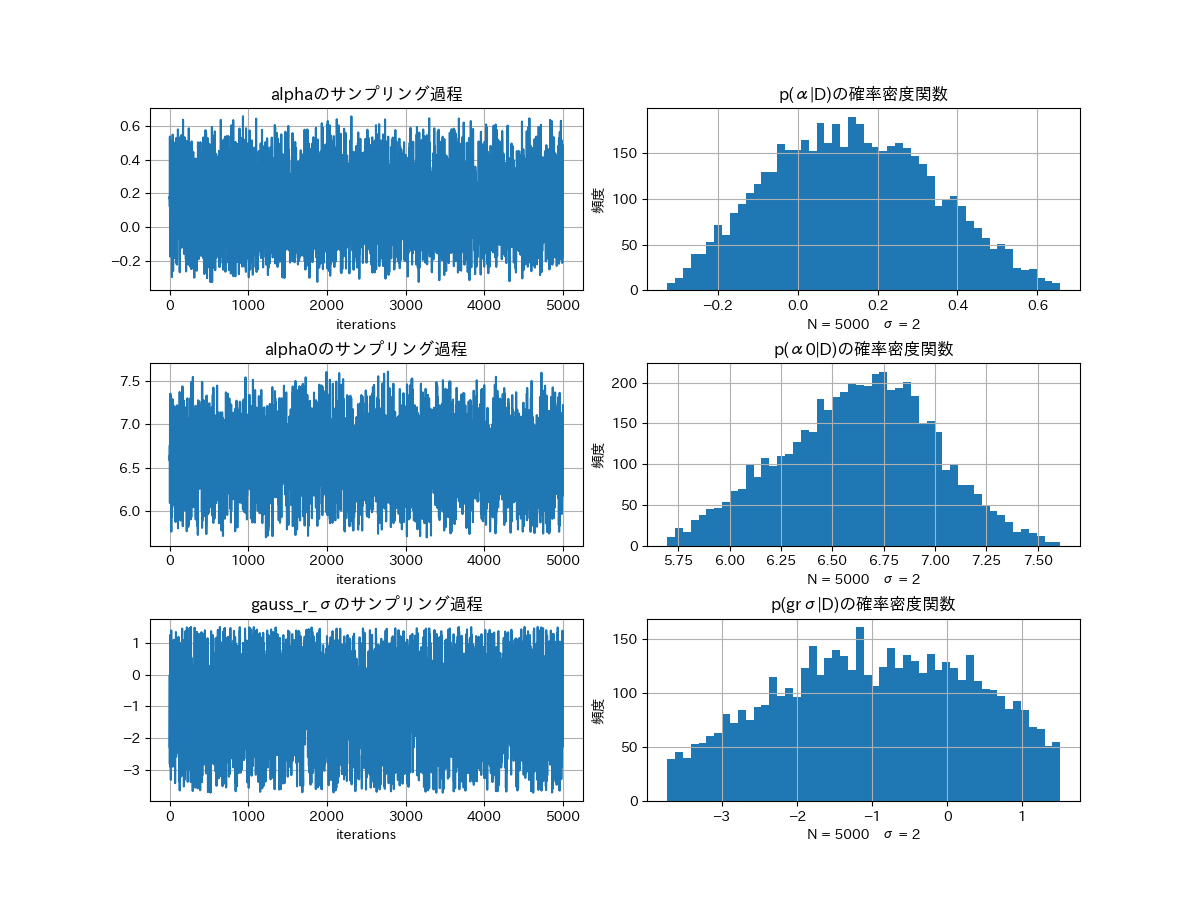

In [6]:
plt.figure(figsize=(12, 9))
plt.subplots_adjust(wspace=0.15,hspace=0.4)

plt.subplot(3,2,1)
plt.plot(np.arange(0, model.sampling_alpha.shape[0], 1), model.sampling_alpha)
plt.title("alphaのサンプリング過程")
plt.xlabel("iterations")
plt.grid(True)

plt.subplot(3,2,2)
plt.hist(model.sampling_alpha[:, 0], bins=50)
plt.title("p(α|D)の確率密度関数")
plt.xlabel(f"N = {model.sampling_alpha.shape[0]}   σ = {2}")
plt.ylabel("頻度")
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(np.arange(0, model.sampling_alpha0.shape[0], 1), model.sampling_alpha0)
plt.title("alpha0のサンプリング過程")
plt.xlabel("iterations")
plt.grid(True)

plt.subplot(3,2,4)
plt.hist(model.sampling_alpha0, bins=50)
plt.title("p(α0|D)の確率密度関数")
plt.xlabel(f"N = {model.sampling_alpha0.shape[0]}   σ = {2}")
plt.ylabel("頻度")
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(np.arange(0, model.sampling_gauss_r_σ.shape[0], 1), model.sampling_gauss_r_σ)
plt.title("gauss_r_σのサンプリング過程")
plt.xlabel("iterations")
plt.grid(True)

plt.subplot(3,2,6)
plt.hist(model.sampling_gauss_r_σ, bins=50)
plt.title("p(grσ|D)の確率密度関数")
plt.xlabel(f"N = {model.sampling_gauss_r_σ.shape[0]}   σ = {2}")
plt.ylabel("頻度")
plt.grid(True)

print("Statistics information")
print("          mean      median      std     mode")
print("alpha     {:.5f}   {:.5f}     {:.5f}     {:.5f}".format(np.mean(model.sampling_alpha    ), np.median(model.sampling_alpha    ), np.std(model.sampling_alpha    ), np_mode(model.sampling_alpha    )))
print("alpha0    {:.5f}   {:.5f}     {:.5f}     {:.5f}".format(np.mean(model.sampling_alpha0   ), np.median(model.sampling_alpha0   ), np.std(model.sampling_alpha0   ), np_mode(model.sampling_alpha0   )))
print("gauss_s   {:.5f}   {:.5f}     {:.5f}     {:.5f}".format(np.mean(model.sampling_gauss_r_σ), np.median(model.sampling_gauss_r_σ), np.std(model.sampling_gauss_r_σ), np_mode(model.sampling_gauss_r_σ)))
print("")

p_alpha     = np.percentile(model.sampling_alpha,     q=[0, 25, 50, 75, 100])
p_alpha0    = np.percentile(model.sampling_alpha0,    q=[0, 25, 50, 75, 100])
p_gauss_r_σ = np.percentile(model.sampling_gauss_r_σ, q=[0, 25, 50, 75, 100])
print("quartiles")
print("          2.5%    25%      50%      75%      97.5%")
print("alpha     {:.5f} {:.5f}  {:.5f}  {:.5f}  {:.5f}".format(p_alpha[0],     p_alpha[1],     p_alpha[2],     p_alpha[3],     p_alpha[4]))
print("alpha0    {:.5f} {:.5f}  {:.5f}  {:.5f}  {:.5f}".format(p_alpha0[0],    p_alpha0[1],    p_alpha0[2],    p_alpha0[3],    p_alpha0[4]))
print("gauss_s   {:.5f} {:.5f}  {:.5f}  {:.5f}  {:.5f}".format(p_gauss_r_σ[0], p_gauss_r_σ[1], p_gauss_r_σ[2], p_gauss_r_σ[3], p_gauss_r_σ[4]))